In [1]:
import pandas as pd
import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
import random
import string
%matplotlib inline

# from week 13 in YY's Data Vis Class
# import spacy
# import wordcloud
# import en_core_web_sm
# # nlp = spacy.load('en')
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [2]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh


full_filename = "../data/by_article_fulltext_020920.jl"

# get full text dataset as a df
full_df = imp.init_df(full_filename, "full")


print("done")

done


In [3]:
full_df.head(50)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,n_posts_author,column1,column2
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,1996-10-18,8:00 am,"by welcome to ""tooling up,"" a monthly column about job hunting and career development for sci...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",18,10,1996,59,no,yes
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,1996-12-20,0:00 am,"by 've always hated the term ""cover letter."" it implies that the letter you send out to acco...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",81,12,1996,59,no,yes
2,5840,dressing scientists for success: male case study,"[tooling up, advice, graduate, postdoc, academic, industry, americas]",peter fiske,1997-09-26,8:00 am,"by e all know that, with respect to fashion, the world holds a rather dim view of scientists...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",361,21,1997,59,no,yes
3,5841,the tooling up book club: on the market,"[tooling up, advice, graduate, postdoc, academic, americas]",peter fiske,1998-01-30,0:00 am,"by ow that the holiday season is over, you have returned to your regular life, in the lab, i...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",487,25,1998,59,no,yes
4,5847,self-assessment exercises: a gre for your ego and superego,"[tooling up, advice, early career, graduate, midcareer, postdoc, undergraduate, academic, govern...",peter fiske,1998-02-27,0:00 am,by --miguel de cervantes any young scientists who explore nontraditional careers are seeking...,"[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",515,26,1998,59,no,yes
5,5845,it's april and i still don't have a job! the panicked scientist's guide to accelerated job searches,"[tooling up, advice, early career, graduate, undergraduate, academic, government, industry, amer...",peter fiske,1998-03-27,0:00 am,by t's 3 a.m. you've been at the bench for 18 hours finishing up your final set of thesis or...,"[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",543,27,1998,59,no,yes
6,5853,dysfunctional advisee-adviser relationships: methods for negotiating beyond conflict,"[tooling up, advice, graduate, government, industry, americas]",peter fiske,1998-04-24,8:00 am,"by n the career-development workshops and lectures i lead, i can always spot a few of them. ...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",571,28,1998,59,no,yes
7,5851,tooling up book club: alternative careers in science: leaving the ivory tower,"[tooling up, advice, early career, graduate, postdoc, other, industry, americas]",peter fiske,1998-05-22,8:00 am,"by ow do i learn about nontraditional careers?"" one of the biggest obstacles facing scientis...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",599,29,1998,59,no,yes
8,5836,i'm too busy! the #1 obstacle to successful career development: insufficient time,"[tooling up, advice, early career, postdoc, academic, government, industry, americas]",peter fiske,1998-06-26,8:00 am,"by ummer is here at last, and for many young scientists it couldn't come soon enough. after ...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",634,30,1998,59,no,yes
9,5832,overcoming the bad habits you learned in grad school,"[tooling up, advice, graduate, postdoc, americas]",peter fiske,1998-07-24,8:00 am,by he national science board--one of the pillars of the academic research establishment--has...,"[peter fiske is a ph.d. scientist and co-founder of rapt industries, a

In [13]:
test_list = cls.predict_from_text_list(full_df["text"])

In [15]:
person_automated = test_list[0]
full_df["person_automated"] = test_list

In [6]:
# full_df.head()

In [11]:
# counts_df = pronouns(full_dict)

# counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
# counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

In [17]:
#

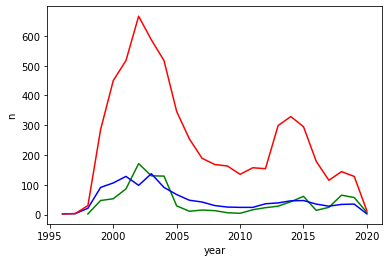

In [18]:
# based on classifier model

first_df = full_df[full_df.person_automated == "first"]
second_df = full_df[full_df.person_automated == "second"]

first_vis = vis.prep_per(first_df, group_by="year")
second_vis = vis.prep_per(second_df, group_by="year")
full_vis = vis.prep_per(full_df, group_by = "year")

sns.lineplot(x = "year", y = "n", color = "green", data=first_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data=second_vis)
sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

# plt.savefig("../figs/by_classifier_over_time.png")

In [19]:
full_advice = "../data/genre_advice_full_021520.jl"

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full")

print("done")

done


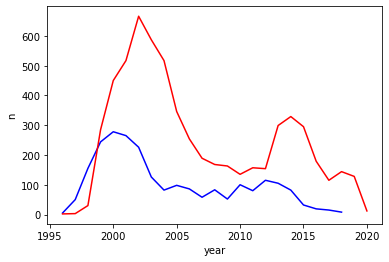

In [28]:
advice_vis = vis.prep_per(advice_df, group_by="year")

sns.lineplot(x = "year", y = "n", color = "blue", data=advice_vis)
sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)


In [23]:
counts_df = clh.pronouns(advice_df)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

counts_df.head()

,id,year,first,second,wc,frac1,frac2
0,0,1996,4,15,1080,0.003704,0.013889
1,1,1996,6,62,1743,0.003442,0.035571
2,2,1996,15,91,1717,0.008736,0.052999
3,3,1997,28,55,1889,0.014823,0.029116
4,4,1997,16,6,295,0.054237,0.020339


In [33]:

counts_plot_df = counts_df.groupby("year").sum()/12

counts_plot_df = counts_plot_df.reset_index()

# if test == True:
#     print(df.head())
#     sns.lineplot(x = w_x, y = "n", color = color, data = df)   
#     plt.pyplot.show()

counts_plot_df

,year,id,first,second,wc,frac1,frac2
0,1996,9.666667,2.666667,15.250000,486.833333,0.002213,0.011173
1,1997,678.666667,40.666667,77.750000,4250.750000,0.038461,0.072103
2,1998,4887.500000,157.833333,216.083333,10616.250000,0.143776,0.224099
3,1999,12186.500000,157.750000,412.333333,18334.750000,0.157838,0.430859
4,2000,19189.000000,267.166667,371.083333,24569.250000,0.255495,0.337393
5,2001,24945.500000,300.250000,468.166667,23989.000000,0.259420,0.400102
6,2002,22865.666667,335.333333,469.416667,20934.666667,0.278008,0.389704
7,2003,13151.500000,214.500000,262.583333,13597.833333,0.161177,0.177235
8,2004,8969.250000,53.750000,109.416667,7253.083333,0.044024,0.094646
9,2005,10951.750000,79.000000,243.416667,12440.333333,0.049386,0.150729


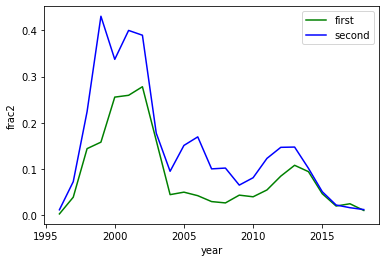

In [30]:
sns.lineplot(x = "year", y = "frac1", color = "green", label="first", data=counts_plot_df)
sns.lineplot(x = "year", y = "frac2", color = "blue", label="second", data=counts_plot_df)
# sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

plt.savefig("../figs/person_advice.png")